In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.5.3'

In [3]:
distances_bert = dict()
cultures = list()
with open('../../data/distances/mean_cosine_distances_tfidf.txt', 'r') as file:
    for line in file:
        _, pair, _, m_distance = line.strip().split(' ')
        c1, c2 = pair.split('-')
        if c1 not in cultures:
            cultures.append(c1)
        if c2 not in cultures:
            cultures.append(c2)
            
        distances_bert[(c1, c2)] = 1 - np.float64(m_distance)

distances_bert

{('Sican', 'Recuay'): 0.4826026835657279,
 ('Sican', 'Vicus'): 0.24212052350018176,
 ('Sican', 'Lima'): 0.6156284818020004,
 ('Sican', 'Gallinazo'): 0.4777881954653721,
 ('Sican', 'Moche'): 0.36838857734677966,
 ('Sican', 'Salinar'): 0.47046201127146303,
 ('Sican', 'Paracas'): 0.7572320787414513,
 ('Sican', 'Wari'): 0.5284486627382541,
 ('Sican', 'Cajamarca'): 0.8898122256648965,
 ('Sican', 'Cupisnique'): 0.5130359947495312,
 ('Sican', 'Pukara'): 0.765591794976917,
 ('Sican', 'Nasca'): 0.6939244103858677,
 ('Sican', 'Chimu'): 0.3368289752881869,
 ('Sican', 'Chanca'): 0.39122491275396876,
 ('Sican', 'Chancay'): 0.7389174867648347,
 ('Sican', 'Inca'): 0.5282567656424687,
 ('Sican', 'Tiahuanaco'): 0.7501207602126444,
 ('Sican', 'Chincha'): 0.6530011131658457,
 ('Recuay', 'Vicus'): 0.4867464690133191,
 ('Recuay', 'Lima'): 0.5820853224214775,
 ('Recuay', 'Gallinazo'): 0.5233467671885288,
 ('Recuay', 'Moche'): 0.4789703489100686,
 ('Recuay', 'Salinar'): 0.590059704813578,
 ('Recuay', 'Paraca

In [4]:
df = pd.DataFrame(index=sorted(cultures), columns=sorted(cultures))

for c in cultures:
    df[c] = df[c].astype(np.float64)
df.head()

,Cajamarca,Chanca,Chancay,Chimu,Chincha,Cupisnique,Gallinazo,Inca,Lima,Moche,Nasca,Paracas,Pukara,Recuay,Salinar,Sican,Tiahuanaco,Vicus,Wari
Cajamarca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chanca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chancay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chimu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chincha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for c1 in cultures:
    for c2 in cultures:
        if c1 == c2:
            df[c1][c2] = 0
        elif (c1, c2) in distances_bert.keys():
            df[c1][c2] = distances_bert[(c1, c2)]
            df[c2][c1] = distances_bert[(c1, c2)]
        elif (c2, c1) in distances_bert.keys():
            df[c1][c2] = distances_bert[(c2, c1)]
            df[c2][c1] = distances_bert[(c2, c1)]
        else:
            df[c1][c2] = 0.0
            df[c2][c1] = 0.0

In [6]:
df

,Cajamarca,Chanca,Chancay,Chimu,Chincha,Cupisnique,Gallinazo,Inca,Lima,Moche,Nasca,Paracas,Pukara,Recuay,Salinar,Sican,Tiahuanaco,Vicus,Wari
Cajamarca,0.000000,0.883449,0.688916,0.895305,0.704633,0.823769,0.987314,0.699490,0.796109,0.844797,0.699006,0.534815,0.720633,0.816295,0.814429,0.889812,0.491160,0.891774,0.788388
Chanca,0.883449,0.000000,0.657929,0.376101,0.683640,0.621439,0.727200,0.572341,0.563228,0.388690,0.442211,0.798970,0.606358,0.504110,0.569391,0.391225,0.770155,0.372595,0.473329
Chancay,0.688916,0.657929,0.000000,0.707243,0.628071,0.796807,0.820388,0.625939,0.656778,0.643946,0.701631,0.637085,0.644548,0.678901,0.716336,0.738917,0.592968,0.684765,0.603518
Chimu,0.895305,0.376101,0.707243,0.000000,0.661199,0.587945,0.462890,0.514585,0.586327,0.401543,0.673131,0.776157,0.760322,0.507386,0.517934,0.336829,0.753071,0.309143,0.507360
Chincha,0.704633,0.683640,0.628071,0.661199,0.000000,0.721477,0.899355,0.559079,0.651804,0.590699,0.711679,0.565301,0.529229,0.642792,0.609238,0.653001,0.541233,0.645879,0.560457
Cupisnique,0.823769,0.621439,0.796807,0.587945,0.721477,0.000000,0.828614,0.665475,0.792391,0.618507,0.738224,0.743253,0.779891,0.643931,0.635339,0.513036,0.733377,0.522121,0.673507
Gallinazo,0.987314,0.727200,0.820388,0.462890,0.899355,0.828614,0.000000,0.770354,0.470693,0.429036,0.848709,0.902976,0.844895,0.523347,0.826621,0.477788,0.918113,0.190957,0.637184
Inca,0.699490,0.572341,0.625939,0.514585,0.559079,0.665475,0.770354,0.000000,0.611767,0.490781,0.660526,0.592323,0.621032,0.556653,0.606793,0.528257,0.562348,0.484716,0.509374
Lima,0.796109,0.563228,0.656778,0.586327,0.651804,0.792391,0.470693,0.611767,0.000000,0.516697,0.594254,0.673134,0.730516,0.582085,0.713280,0.615628,0.651841,0.469948,0.516449
Moche,0.844797,0.388690,0.643946,0.401543,0.590699,0.618507,0.429036,0.490781,0.516697,0.000000,0.637115,0.705262,0.666180,0.478970,0.525638,0.368389,0.674126,0.323744,0.467660


### Creamos un heatmap con las distancias

### Escalamos las distancias promedios para poder ver gráficamente mayores diferencias

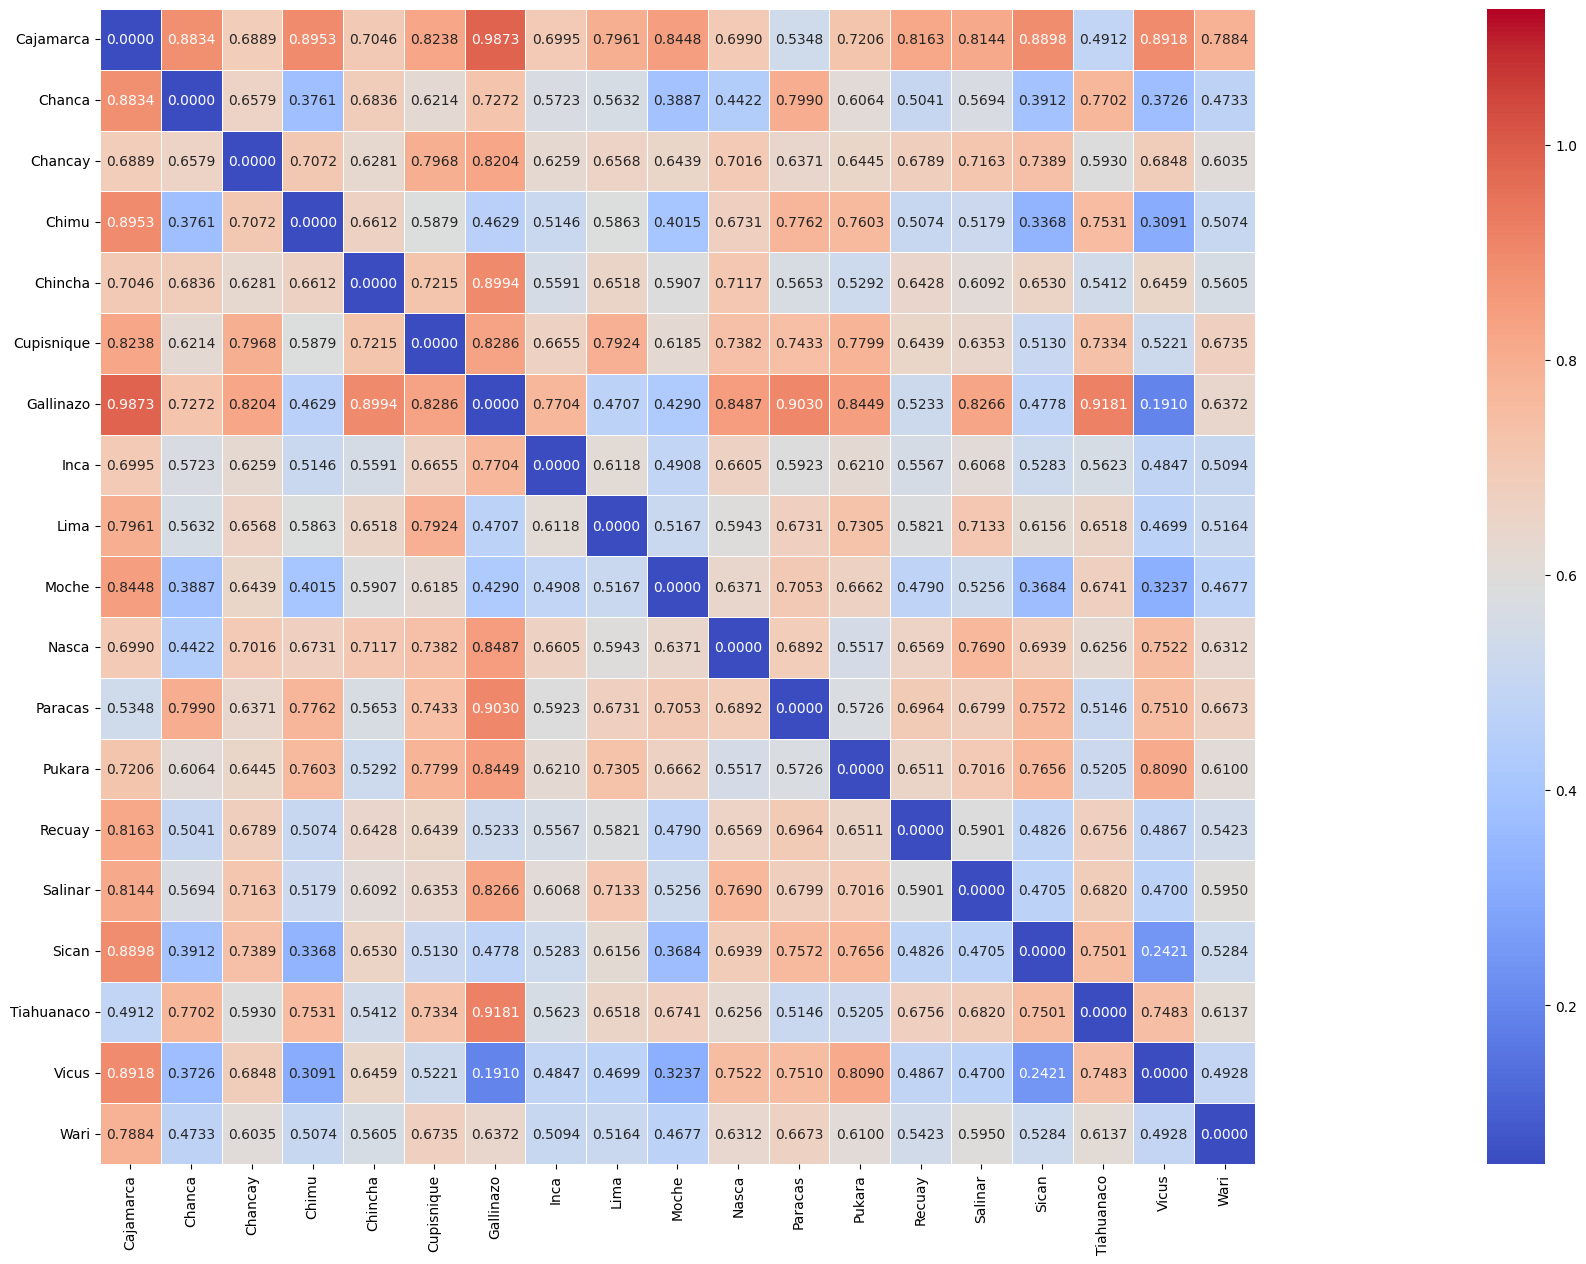

In [8]:
max_mean_distance = np.max(list(distances_bert.values()))
min_mean_distance = np.min(list(distances_bert.values()))
std_mean_distance = np.std(list(distances_bert.values()))

fig, ax = plt.subplots(figsize=(60, 15))
sns.heatmap(df, 
            vmax=max_mean_distance+std_mean_distance, 
            vmin=min_mean_distance-std_mean_distance, 
            cmap='coolwarm', 
            linewidths=.5, 
            square=True,
            annot=True,
            fmt=".4f",
            
            ax=ax)
plt.show()

In [19]:
culture_pairs = [(a, b) for idx, a in enumerate(cultures) for b in cultures[idx + 1:]]
culture_pairs

[('Sican', 'Recuay'),
 ('Sican', 'Vicus'),
 ('Sican', 'Lima'),
 ('Sican', 'Gallinazo'),
 ('Sican', 'Moche'),
 ('Sican', 'Salinar'),
 ('Sican', 'Paracas'),
 ('Sican', 'Wari'),
 ('Sican', 'Cajamarca'),
 ('Sican', 'Cupisnique'),
 ('Sican', 'Pukara'),
 ('Sican', 'Nasca'),
 ('Sican', 'Chimu'),
 ('Sican', 'Chanca'),
 ('Sican', 'Chancay'),
 ('Sican', 'Inca'),
 ('Sican', 'Tiahuanaco'),
 ('Sican', 'Chincha'),
 ('Recuay', 'Vicus'),
 ('Recuay', 'Lima'),
 ('Recuay', 'Gallinazo'),
 ('Recuay', 'Moche'),
 ('Recuay', 'Salinar'),
 ('Recuay', 'Paracas'),
 ('Recuay', 'Wari'),
 ('Recuay', 'Cajamarca'),
 ('Recuay', 'Cupisnique'),
 ('Recuay', 'Pukara'),
 ('Recuay', 'Nasca'),
 ('Recuay', 'Chimu'),
 ('Recuay', 'Chanca'),
 ('Recuay', 'Chancay'),
 ('Recuay', 'Inca'),
 ('Recuay', 'Tiahuanaco'),
 ('Recuay', 'Chincha'),
 ('Vicus', 'Lima'),
 ('Vicus', 'Gallinazo'),
 ('Vicus', 'Moche'),
 ('Vicus', 'Salinar'),
 ('Vicus', 'Paracas'),
 ('Vicus', 'Wari'),
 ('Vicus', 'Cajamarca'),
 ('Vicus', 'Cupisnique'),
 ('Vicus', 'Pu